In [95]:
import numpy as np
import pandas as pd
import csv
input_file = "cities.csv"
df = pd.read_csv(input_file, header = 0)
df.sort_values(['distance'])
with open('cities.csv') as f:
    try:
        data=[tuple(line) for line in csv.reader(f)]    
    except:
        print("select a proper file path")
        
    

In [96]:
data.pop(0)
print(data)

[('BalÄ±kesir', 'Ã‡anakkale', '95'), ('Ã‡anakkale', 'Ä°stanbul', '125'), ('BalÄ±kesir', 'Ä°stanbul', '155'), ('Ä°zmir', 'BalÄ±kesir', '140'), ('Ä°zmir', 'EskiÅŸehir', '220'), ('Ä°stanbul', 'EskiÅŸehir', '130'), ('Ä°stanbul', 'Samsun', '215'), ('EskiÅŸehir', 'Ankara', '70'), ('EskiÅŸehir', 'Konya', '120'), ('Ankara', 'Konya', '95'), ('Ä°zmir', 'MuÄŸla', '190'), ('MuÄŸla', 'Konya', '85'), ('MuÄŸla', 'Antalya', '80'), ('Antalya', 'Adana', '80'), ('Samsun', 'Trabzon', '120'), ('Ankara', 'Samsun', '115'), ('Kayseri', 'Konya', '185'), ('Kayseri', 'Trabzon', '110'), ('Trabzon', 'Rize', '75'), ('Kayseri', 'DiyarbakÄ±r', '145'), ('Kayseri', 'Adana', '245'), ('Rize', 'DiyarbakÄ±r', '165')]


Total number of nodes:  15
Total number of edges:  22
List of all nodes:  ['BalÄ±kesir', 'Ã‡anakkale', 'Ä°stanbul', 'Ä°zmir', 'EskiÅŸehir', 'Samsun', 'Ankara', 'Konya', 'MuÄŸla', 'Antalya', 'Adana', 'Trabzon', 'Kayseri', 'Rize', 'DiyarbakÄ±r']
List of all edges:  [('BalÄ±kesir', 'Ã‡anakkale', {'relation': '95'}), ('BalÄ±kesir', 'Ä°stanbul', {'relation': '155'}), ('BalÄ±kesir', 'Ä°zmir', {'relation': '140'}), ('Ã‡anakkale', 'Ä°stanbul', {'relation': '125'}), ('Ä°stanbul', 'EskiÅŸehir', {'relation': '130'}), ('Ä°stanbul', 'Samsun', {'relation': '215'}), ('Ä°zmir', 'EskiÅŸehir', {'relation': '220'}), ('Ä°zmir', 'MuÄŸla', {'relation': '190'}), ('EskiÅŸehir', 'Ankara', {'relation': '70'}), ('EskiÅŸehir', 'Konya', {'relation': '120'}), ('Samsun', 'Trabzon', {'relation': '120'}), ('Samsun', 'Ankara', {'relation': '115'}), ('Ankara', 'Konya', {'relation': '95'}), ('Konya', 'MuÄŸla', {'relation': '85'}), ('Konya', 'Kayseri', {'relation': '185'}), ('MuÄŸla', 'Antalya', {'relation': '80'}), ('Ant

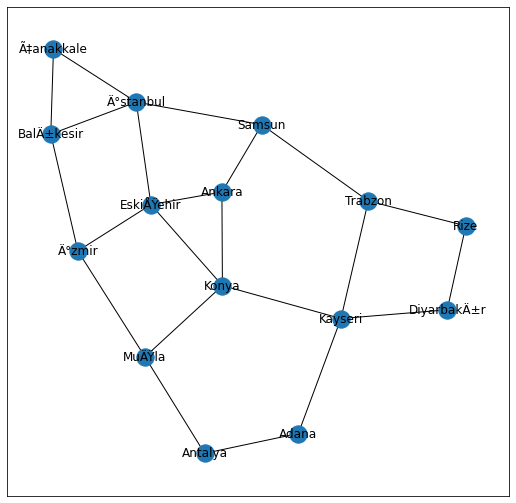

In [97]:
import networkx as nx
import matplotlib.pyplot as plt
  
G = nx.MultiGraph()
relations = data
  
for i in relations:
    G.add_edge(i[0], i[1], relation = i[2])
      
plt.figure(figsize =(9, 9))
nx.draw_networkx(G)
  
# getting various graph properties
print("Total number of nodes: ", int(G.number_of_nodes()))
print("Total number of edges: ", int(G.number_of_edges()))
print("List of all nodes: ", list(G.nodes()))
print("List of all edges: ", list(G.edges(data = True)))
print("Degree for all nodes: ", dict(G.degree()))

In [98]:
from sys import argv
from heapq import heappush, heappop

In [99]:
def UCS(graph, s, goal):
	# define dummy variables for use
	nodesQ = []
	visited_nodes = {}
	prev_nodes = {}

	# using heap for mainitng a queue
	heappush(nodesQ,(0,s,None,0))
	for nodes in graph:
		visited_nodes[nodes] = False
		prev_nodes[nodes] = None
	i = 1
	# mark all visited and previous nodes False and None
	while len(nodesQ) != 0:
		# pop the least cost node from heap and analyse it
		print ("\nFringe at Loop#: ",i)
		print (nodesQ)
		i = i+1
		total_cost, current_node, prev_node, link_cost = heappop(nodesQ)
		if visited_nodes[current_node] == False:
			visited_nodes[current_node] = True
			prev_nodes[current_node] = []
			prev_nodes[current_node].append(prev_node)
			prev_nodes[current_node].append(link_cost)
			# if goal return the total route
			if current_node == goal:
				final = []
				while current_node != s:
					temp = []
					temp.append(current_node)
					for i in prev_nodes[current_node]:
						temp.append(i)
					final.append(temp)
					current_node = prev_nodes[current_node][0]
				final.reverse()
				# retrn total cost and final path
				return total_cost,final
			# else explore neighbours
			for neighbors, ncost in graph[current_node].items():
				if visited_nodes[neighbors] == False:
					this_link_cost = ncost
					new_cost = total_cost + ncost
					heappush(nodesQ, (new_cost, neighbors, current_node, ncost))
	# return none if no path found

	return None
	pass

In [100]:
def main(arg1, arg2):
    # checking arguments for processing
    try:
        
        Source=arg1
        Destination=arg2
    except IndexError:
        print ('\n***Insufficient argument***\n')
        return
    # empty graph
    G = {}
    for i in range(0,len(data)):
        src = data[i][0]
        dest = data[i][1]
        cst = data[i][2]
        if src not in G:
            G[src] ={}
        if dest not in G:
            G[dest] ={}
        # create src and dest nodes with its length from input file
        G[src][dest] = int(cst)
        G[dest][src] = int(cst)

        
        
        
        
    # call the UCS function
    result = UCS(G,Source,Destination)

    print ("\n\nFinal output: \n")
    # print the result in the required format
    if result == None:
        print ("\ndistance: infinity\nroute:\nnone\n")
    else:
        print ("\ndistance:",result[0],"km\nroute:")
        for line in result[1]:
            print ("%s to %s, %s km" % (line[1],line[0],line[2]))
        print ("")

    pass

In [102]:
# Starting point to ending point 

main('Ä°stanbul','Rize')


Fringe at Loop#:  1
[(0, 'Ä°stanbul', None, 0)]

Fringe at Loop#:  2
[(125, 'Ã‡anakkale', 'Ä°stanbul', 125), (155, 'BalÄ±kesir', 'Ä°stanbul', 155), (130, 'EskiÅŸehir', 'Ä°stanbul', 130), (215, 'Samsun', 'Ä°stanbul', 215)]

Fringe at Loop#:  3
[(130, 'EskiÅŸehir', 'Ä°stanbul', 130), (155, 'BalÄ±kesir', 'Ä°stanbul', 155), (215, 'Samsun', 'Ä°stanbul', 215), (220, 'BalÄ±kesir', 'Ã‡anakkale', 95)]

Fringe at Loop#:  4
[(155, 'BalÄ±kesir', 'Ä°stanbul', 155), (200, 'Ankara', 'EskiÅŸehir', 70), (215, 'Samsun', 'Ä°stanbul', 215), (350, 'Ä°zmir', 'EskiÅŸehir', 220), (220, 'BalÄ±kesir', 'Ã‡anakkale', 95), (250, 'Konya', 'EskiÅŸehir', 120)]

Fringe at Loop#:  5
[(200, 'Ankara', 'EskiÅŸehir', 70), (220, 'BalÄ±kesir', 'Ã‡anakkale', 95), (215, 'Samsun', 'Ä°stanbul', 215), (350, 'Ä°zmir', 'EskiÅŸehir', 220), (250, 'Konya', 'EskiÅŸehir', 120), (295, 'Ä°zmir', 'BalÄ±kesir', 140)]

Fringe at Loop#:  6
[(215, 'Samsun', 'Ä°stanbul', 215), (220, 'BalÄ±kesir', 'Ã‡anakkale', 95), (295, 'Konya', 'Ankara', 95)